<a href="https://colab.research.google.com/github/Tizzy1999/ml2019/blob/master/pandas_tutorial3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

##**Practice with plolicing**

In [0]:
police_url = '/content/gdrive/My Drive/201911ML/police.txt'
ri = pd.read_csv(police_url)

## **Dataset1: Policing Project**

In [0]:
ri.head(3)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [0]:
ri.shape

(91741, 15)

In [0]:
ri.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [0]:
# the count of missing value in each column
ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [0]:
ri.isnull().mean()

stop_date             0.000000
stop_time             0.000000
county_name           1.000000
driver_gender         0.058153
driver_age_raw        0.058066
driver_age            0.061270
driver_race           0.058131
violation_raw         0.058131
violation             0.058131
search_conducted      0.000000
search_type           0.965163
stop_outcome          0.058131
is_arrested           0.058131
stop_duration         0.058131
drugs_related_stop    0.000000
dtype: float64

In [0]:
# 1. Remove column that contains missing values only
ri.drop('county_name',axis="columns",inplace=True)

In [0]:
ri.shape

(91741, 14)

In [0]:
# 2. Do man or woman speed more often?
ri.violation.value_counts(dropna=False)

Speeding               48463
Moving violation       16224
Equipment              11020
NaN                     5333
Other                   4317
Registration/plates     3432
Seat belt               2952
Name: violation, dtype: int64

In [0]:
# Perspective 1: 
# for all speeding violations, percentage of male versus female
ri[ri.violation == 'Speeding'].driver_gender.value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [0]:
# Perspective 2:
# Out of all violations for male, percentage of speeding 
ri[ri.driver_gender=='M'].violation.value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [0]:
# Out of all violations for female, percentage of speeding
ri[ri.driver_gender=='F'].violation.value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [0]:
# Summarize
ri.groupby('driver_gender').violation.value_counts(normalize=True).loc[:,'Speeding']

driver_gender
F    0.65850
M    0.52435
Name: violation, dtype: float64

In [0]:
# 3. Does gender affect who gets searched during a stop?
ri.search_conducted.mean()

0.03483720473942948

In [0]:
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

In [0]:
# if you dig more deeply, you'll find that 
# male gets a higher search rate 
# for every violation
ri.groupby(['violation','driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

In [0]:
# 4. Why's search_type missing so often?
ri.search_type.isnull().mean()

0.9651627952605705

In [0]:
ri.search_type.isnull().sum()

88545

In [0]:
# as you can see, the NaN for search_type match the False for search_conducted
ri.search_conducted.value_counts(dropna=False)

False    88545
True      3196
Name: search_conducted, dtype: int64

In [0]:
# 5. During a search, how often is the driver frisked?
ri.search_type.value_counts(normalize=True)

Incident to Arrest                                          0.381414
Probable Cause                                              0.278786
Inventory                                                   0.068836
Reasonable Suspicion                                        0.061640
Protective Frisk                                            0.050375
Incident to Arrest,Inventory                                0.040363
Incident to Arrest,Probable Cause                           0.033166
Probable Cause,Reasonable Suspicion                         0.023467
Incident to Arrest,Inventory,Probable Cause                 0.010638
Incident to Arrest,Protective Frisk                         0.010325
Probable Cause,Protective Frisk                             0.010325
Inventory,Probable Cause                                    0.006884
Incident to Arrest,Reasonable Suspicion                     0.004068
Protective Frisk,Reasonable Suspicion                       0.003442
Inventory,Protective Frisk        

In [0]:
ri['frisk'] = ri.search_type.str.contains('Protective Frisk')

In [0]:
ri.frisk.value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

In [0]:
# By default, NaN is excluded during calculation 
ri.frisk.mean()

0.08573216520650813

In [0]:
# 6. Which year has the least number of stops?
ri.stop_date.sample(10)

53249    2011-10-17
3884     2006-02-10
90658    2015-11-08
11121    2006-10-21
65024    2012-11-16
59620    2012-05-05
71874    2013-09-23
72260    2013-10-10
79406    2014-07-25
58982    2012-04-16
Name: stop_date, dtype: object

In [0]:
ri.stop_time.sample(10)

10808    11:47
41341    13:52
15688    15:21
88126    13:00
7403     02:08
971      11:35
36280    18:23
466      01:45
51316    09:02
14200    16:50
Name: stop_time, dtype: object

In [0]:
ri.stop_date.str.slice(0,4).value_counts(dropna=False)

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [0]:
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
combined.head()

0    2005-01-02 01:55
1    2005-01-18 08:15
2    2005-01-23 23:15
3    2005-02-20 17:15
4    2005-03-14 10:00
Name: stop_date, dtype: object

In [0]:
ri['stop_datetime'] = pd.to_datetime(combined)

In [0]:
# the data type changed to datetime64
ri.stop_datetime.head()

0   2005-01-02 01:55:00
1   2005-01-18 08:15:00
2   2005-01-23 23:15:00
3   2005-02-20 17:15:00
4   2005-03-14 10:00:00
Name: stop_datetime, dtype: datetime64[ns]

In [0]:
ri.stop_datetime.dt.year.value_counts().sort_values()

2005     2558
2010     7561
2009     7908
2013     7924
2011     8126
2015     8599
2008     8752
2014     9228
2007     9476
2006    10639
2012    10970
Name: stop_datetime, dtype: int64

In [0]:
ri.stop_datetime.dt.year.value_counts().sort_values().index[0]

2005

In [0]:
# 7. How drug activity changes by time of day?
ri.drugs_related_stop.mean()

0.008883705213590434

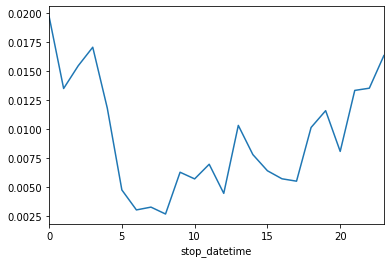

In [0]:
# for each hour, the rate of drugs related stop
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

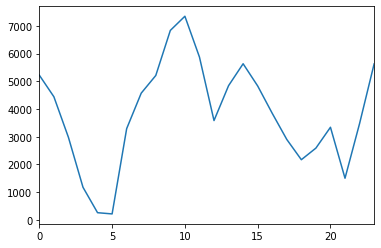

In [0]:
# 8. Do most stops occur at night?
ri.stop_datetime.dt.hour.value_counts().sort_index().plot()


In [0]:
# 9. Find the bad data in the stop_duration column and fix it
ri.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [0]:
import numpy as np
ri.loc[(ri.stop_duration == '1') | (ri.stop_duration == '2'),'stop_duration'] = np.nan

In [0]:
ri.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
Name: stop_duration, dtype: int64